In [2]:
# laod library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics
import seaborn as sn

In [3]:
# Load in data
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()
K = len(set(y_train))

x_train, x_test = x_train/255., x_test/255.

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)


In [17]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
i = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.Conv2D(4*1, (4,4), strides = 1, activation='relu', padding ='same')(i)
x = tf.keras.layers.Conv2D(8*1, (4,4), strides = 1, activation='relu', padding ='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(8*1, (4,4), strides = 1, activation='relu', padding ='same')(x)
x = tf.keras.layers.Conv2D(8*2, (4,4), strides = 1, activation='relu', padding ='same')(x)
x = tf.keras.layers.Conv2D(8*2, (4,4), strides = 1, activation='relu', padding ='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(8*3, (7,7), strides = 1, activation='relu', padding ='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)
model = tf.keras.models.Model(i, x)

In [37]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy" , metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1233 - accuracy: 0.9535 - val_loss: 0.2623 - val_accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1117 - accuracy: 0.9589 - val_loss: 0.2815 - val_accuracy: 0.9117
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1096 - accuracy: 0.9596 - val_loss: 0.2971 - val_accuracy: 0.9095
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1028 - accuracy: 0.9611 - val_loss: 0.2851 - val_accuracy: 0.9123
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0958 - accuracy: 0.9631 - val_loss: 0.3051 - val_accuracy: 0.9111


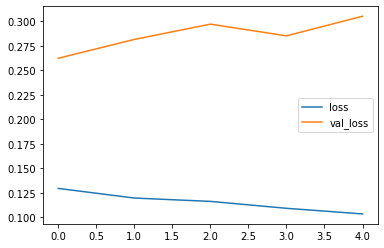

In [38]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

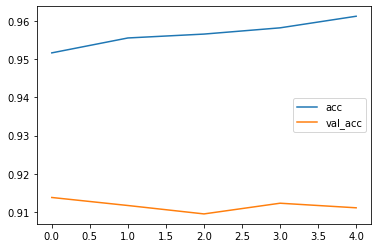

In [39]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

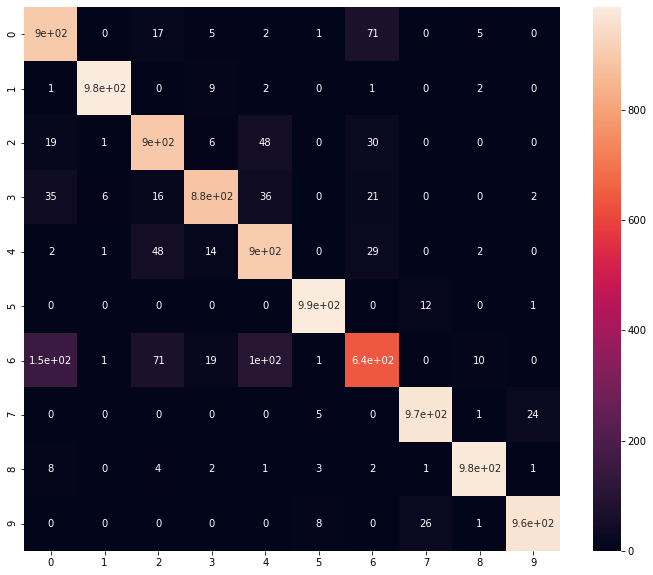

In [40]:
p_test = model.predict(x_test).argmax(axis=1)
cm = sklearn.metrics.confusion_matrix(y_test,p_test)
plt.figure(figsize=(12,10))
sn.heatmap(cm, annot=True);

In [41]:
cm

array([[899,   0,  17,   5,   2,   1,  71,   0,   5,   0],
       [  1, 985,   0,   9,   2,   0,   1,   0,   2,   0],
       [ 19,   1, 896,   6,  48,   0,  30,   0,   0,   0],
       [ 35,   6,  16, 884,  36,   0,  21,   0,   0,   2],
       [  2,   1,  48,  14, 904,   0,  29,   0,   2,   0],
       [  0,   0,   0,   0,   0, 987,   0,  12,   0,   1],
       [153,   1,  71,  19, 102,   1, 643,   0,  10,   0],
       [  0,   0,   0,   0,   0,   5,   0, 970,   1,  24],
       [  8,   0,   4,   2,   1,   3,   2,   1, 978,   1],
       [  0,   0,   0,   0,   0,   8,   0,  26,   1, 965]])